<a href="https://colab.research.google.com/github/ulti72/KMClustering/blob/master/KMClustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
#Uploading kaggle.json from kaggle account
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"ulti72","key":"48282a59b3c253605adb3ce5aa7ad10a"}'}

In [0]:
# The Kaggle API client expects this file to be in ~/.kaggle,
# so move it there.
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [0]:
# This permissions change avoids a warning on Kaggle tool startup.
!chmod 600 ~/.kaggle/kaggle.json

In [7]:
#Downloading dataset from kaggle.
!kaggle datasets download -d moltean/fruits 

 99% 700M/709M [00:17<00:00, 44.6MB/s]
100% 709M/709M [00:17<00:00, 42.5MB/s]


In [8]:
# Unzip the data
!unzip fruits.zip

Archive:  fruits.zip
   creating: fruits-360/
  inflating: fruits-360/LICENSE      
   creating: fruits-360/papers/
  inflating: fruits-360/readme.md    
   creating: fruits-360/test-multiple_fruits/
  inflating: fruits-360/test-multiple_fruits/apple_apricot_nectarine_peach_peach(flat)_pomegranate_pear_plum.jpg  
  inflating: fruits-360/test-multiple_fruits/apple_apricot_peach_peach(flat)_pomegranate_pear_plum.jpg  
  inflating: fruits-360/test-multiple_fruits/apple_apricot_peach_peach(flat)_pomegranate_pear_plum_2.jpg  
  inflating: fruits-360/test-multiple_fruits/apple_apricot_peach_peach(flat)_pomegranate_pear_plum_3.jpg  
   creating: fruits-360/Training/
   creating: fruits-360/Training/Apple Braeburn/
  inflating: fruits-360/Training/Apple Braeburn/0_100.jpg  
  inflating: fruits-360/Training/Apple Braeburn/100_100.jpg  
  inflating: fruits-360/Training/Apple Braeburn/101_100.jpg  
  inflating: fruits-360/Training/Apple Braeburn/102_100.jpg  
  inflating: fruits-360/Training/Appl

In [0]:
#importing modules
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2

In [0]:
name=[] #for storing path of our data
#Storing path of images from training and test folder
import os
      
for dirname, _, filenames in os.walk('/content/fruits-360/Training'):
    for filename in filenames:
        name.append(os.path.join(dirname,filename))

for dirname, _, filenames in os.walk('/content/fruits-360/Test'):
    for filename in filenames:
        name.append(os.path.join(dirname,filename))
   

In [11]:
#total data
import random

len(name)
#Shuffuling so that images will be mixed
random.shuffle(name)

#taking small dataset for faster training and testing
name= name[0:10000]
len(name)



10000

In [0]:
# Display two images two compare original image and processed image
def display(a, b, title1 = "Original", title2 = "Processed"):
    a= cv2.imread(a)
    plt.subplot(121), plt.imshow(a), plt.title(title1)
    plt.xticks([]), plt.yticks([])
    plt.subplot(122), plt.imshow(b), plt.title(title2)
    plt.xticks([]), plt.yticks([])
    plt.show()


In [0]:
# Preprocessing: removing noise and storing image in "train" array
train=[]
def processing(data):
    
    #reading image
    img = [cv2.imread(i, cv2.IMREAD_UNCHANGED) for i in data]
    # Remove noise
    # Using Gaussian Blur
    no_noise = []
    for i in range(len(img)):
        blur = cv2.GaussianBlur(img[i], (5, 5), 0)
        no_noise.append(blur)
        image = no_noise[i]
        train.append(image)

In [0]:
#Preprocessing and putting data into np array...
processing(name)
train = np.array(train)

In [15]:
#10000 training data with 100x100 resolution and 3 is RGB values for each pixel
train.shape

(10000, 100, 100, 3)

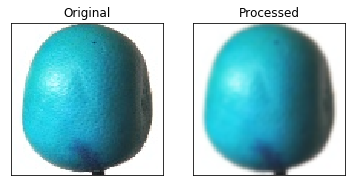

In [16]:
#Original data vs Processed data
display(name[1432],train[1432])


In [0]:
px = train.shape[1]
m_train = train.shape[0]


In [18]:
train = train.reshape(m_train,px*px*3)
train.shape
#10000 images with 30000 features

(10000, 30000)

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns;
from scipy import ndimage
from sklearn.cluster import KMeans


In [0]:
#Applying Kmeans
kmeans = KMeans(n_clusters=10, random_state=0)
clusters = kmeans.fit_predict(train)


In [21]:
centers = kmeans.cluster_centers_
centers.shape

(10, 30000)

In [22]:
type(clusters)

numpy.ndarray

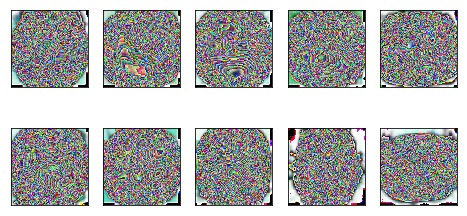

In [25]:
#plotting clusters......
fig, ax = plt.subplots(2, 5, figsize=(8, 4))
centers = kmeans.cluster_centers_.reshape(10, 100, 100,3)
for axi, center in zip(ax.flat, centers):
    axi.set(xticks=[], yticks=[])
    axi.imshow((center*255).astype(np.uint8), interpolation='nearest')